In [26]:
#Author: Trey Martin
#Date: 10/22/2024
#This program reads in a raw health spending data sheet, filters the data to the
#top 10 countries in % spending of their GDP for the years 2016-2021, which is displayed on a graph.
#Data frames and a graph are created and saved as a png file.

import pandas as pd
import matplotlib.pyplot as plt

In [28]:
#sets the display options for pandas
pd.set_option('display.notebook_repr_html', True) #display pandas DataFrames as HTML tables
pd.set_option('display.precision', 2) #sets the precision for displaying numerical data to 2 decimal places
pd.set_option('display.float_format', '{:.2f}'.format) #sets the floating-point number format to two decimal
                                                       #places using Python string formatting

In [30]:
#load the data
file = pd.read_csv('Health_API_SH.XPD.CHEX.GD.ZS_DS2_en_excel_v2_15.csv', skiprows = 3)

In [32]:
#displays the first five rows
file.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.84,6.00,6.10,5.95,5.81,5.83,5.88,5.87,NaN,NaN
2,Afghanistan,AFG,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,9.53,10.11,11.82,12.62,14.21,14.83,15.53,21.83,NaN,NaN
3,Africa Western and Central,AFW,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.58,3.81,3.80,3.82,3.43,3.42,3.84,4.14,NaN,NaN
4,Angola,AGO,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.43,2.61,2.71,2.79,2.59,2.48,3.22,2.96,NaN,NaN


In [34]:
#prints the names of the columns to check for any differences or mistakes
print(file.columns)

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')


In [36]:
#finds the top 10 GDP spenders from 2016-2021

#sum of the GDP spending percentage for each country over all years
gdp_total = file.groupby('Country Name').sum()

#calculate the total GDP spending for each country from 2016-2021
gdp_total['Total'] = gdp_total.loc[:, '2016':'2021'].sum(axis=1)

#sort the countries based on their total GDP spending %
top_ten_countries = gdp_total.nlargest(50, 'Total')['Total']

#print the top ten countries
print(top_ten_countries)

Country Name
Tuvalu                      122.78
United States               102.98
North America               100.42
Afghanistan                  90.84
Marshall Islands             85.35
Palau                        81.14
Post-demographic dividend    79.61
Kiribati                     79.29
OECD members                 76.90
High income                  75.58
Liberia                      72.73
Cuba                         72.07
Germany                      71.40
Nauru                        70.88
Micronesia, Fed. Sts.        70.05
France                       69.56
Canada                       69.22
Switzerland                  67.40
Armenia                      66.28
Sweden                       65.99
Belgium                      65.49
Austria                      65.06
Japan                        64.85
United Kingdom               63.54
Lesotho                      63.37
Euro area                    63.29
Netherlands                  62.83
Norway                       62.66
Denmark

In [38]:
#list of the top ten countries
top_countries = ['Tuvalu', 'United States', 'Afghanistan', 'Marshall Islands', 'Palau', \
                 'Kiribati', 'Liberia', 'Cuba', 'Germany', 'Nauru']

#years 2016 to 2021
years = list(range(2016, 2022))
years

[2016, 2017, 2018, 2019, 2020, 2021]

In [40]:
#filter rows for the top countries
gdp = file[file['Country Name'].isin(top_countries)]

#filter columns for the specified years
gdp = gdp[['Country Name'] + [str(year) for year in years]]

gdp

,Country Name,2016,2017,2018,2019,2020,2021
2,Afghanistan,11.82,12.62,14.21,14.83,15.53,21.83
50,Cuba,12.22,11.47,11.02,11.08,12.49,13.79
55,Germany,11.24,11.34,11.48,11.72,12.69,12.93
124,Kiribati,10.47,11.46,12.97,12.59,16.99,14.81
131,Liberia,9.90,10.47,10.35,8.42,16.97,16.62
155,Marshall Islands,15.74,14.39,15.26,14.83,12.59,12.55
179,Nauru,10.99,11.49,11.10,11.56,12.68,13.06
188,Palau,11.63,12.53,12.86,13.40,14.34,16.38
245,Tuvalu,18.62,24.28,18.64,22.41,18.86,19.97
251,United States,16.80,16.77,16.63,16.67,18.76,17.36


In [42]:
#reindex the DataFrames to match the top_countries_desc order
gdp = gdp.set_index('Country Name').loc[top_countries].reset_index()
gdp

,Country Name,2016,2017,2018,2019,2020,2021
0,Tuvalu,18.62,24.28,18.64,22.41,18.86,19.97
1,United States,16.80,16.77,16.63,16.67,18.76,17.36
2,Afghanistan,11.82,12.62,14.21,14.83,15.53,21.83
3,Marshall Islands,15.74,14.39,15.26,14.83,12.59,12.55
4,Palau,11.63,12.53,12.86,13.40,14.34,16.38
5,Kiribati,10.47,11.46,12.97,12.59,16.99,14.81
6,Liberia,9.90,10.47,10.35,8.42,16.97,16.62
7,Cuba,12.22,11.47,11.02,11.08,12.49,13.79
8,Germany,11.24,11.34,11.48,11.72,12.69,12.93
9,Nauru,10.99,11.49,11.10,11.56,12.68,13.06


In [44]:
#visualize the data 
gdp.head(10)

,Country Name,2016,2017,2018,2019,2020,2021
0,Tuvalu,18.62,24.28,18.64,22.41,18.86,19.97
1,United States,16.80,16.77,16.63,16.67,18.76,17.36
2,Afghanistan,11.82,12.62,14.21,14.83,15.53,21.83
3,Marshall Islands,15.74,14.39,15.26,14.83,12.59,12.55
4,Palau,11.63,12.53,12.86,13.40,14.34,16.38
5,Kiribati,10.47,11.46,12.97,12.59,16.99,14.81
6,Liberia,9.90,10.47,10.35,8.42,16.97,16.62
7,Cuba,12.22,11.47,11.02,11.08,12.49,13.79
8,Germany,11.24,11.34,11.48,11.72,12.69,12.93
9,Nauru,10.99,11.49,11.10,11.56,12.68,13.06


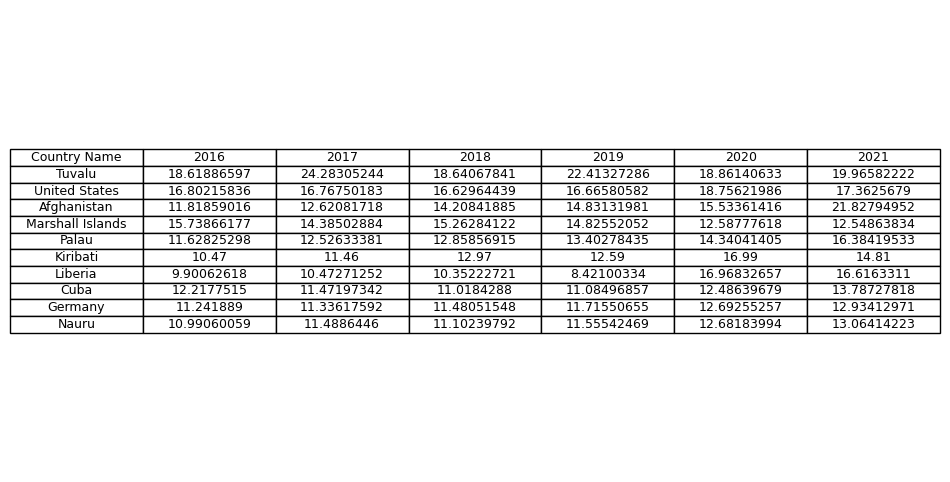

In [46]:
#data shows the top 10 GDP spenders

#create a table plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('off') #hide the axes
ax.table(cellText=gdp.head(10).values,
         colLabels=gdp.columns,
         cellLoc='center',
         loc='center')

#save the chart as a PNG file with high resolution (300 DPI)
plt.savefig('top_10_gdp_countries.png', dpi=300, bbox_inches='tight', pad_inches=0.2) #increase the padding
plt.show()

In [48]:
#create graph showing the GDP spending of the top 10 countries

def plot_gdp_spending(gdp):
    #extracting unique country names from the 'Country Name' column
    countries = gdp['Country Name'].unique()

    #reordering countries to match the top_countries list
    countries = [country for country in top_countries if country in countries]

    #plotting the GDP spending for each country
    plt.figure(figsize=(12, 8))  # Set a larger figure size
    for country in countries:
        gdp_vals = gdp.loc[gdp['Country Name'] == country, '2016':'2021'].values.flatten()
        #converts gdp spending to a percent of the total for each year
        gdp_percent = (gdp_vals / gdp_vals.sum()) * 100 #calculates the percentage relative to the sum of GDP
        plt.plot(gdp_percent, label=country)

    #add title and labels to the plot
    plt.title('GDP Spending of Countries (2016-2021)', fontsize=16, fontweight='bold')
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('GDP Spending (% of Total)', fontsize=14)
    
    #add a legend with country names
    plt.legend(title='Country', loc='upper left', fontsize=10, bbox_to_anchor=(1.02, 1), ncol=1)

    #set x-axis labels
    plt.xticks(ticks=range(6), labels=['2016', '2017', '2018', '2019', '2020', '2021'], fontsize=12)
    plt.yticks(fontsize=12)

    plt.grid(False)
    plt.margins(x=0)
    
    #save the chart as a PNG file with high resolution (300 DPI)
    plt.savefig('gdp_spending.png', dpi=300, bbox_inches='tight', pad_inches=0.2) #increase the padding
    plt.show() 

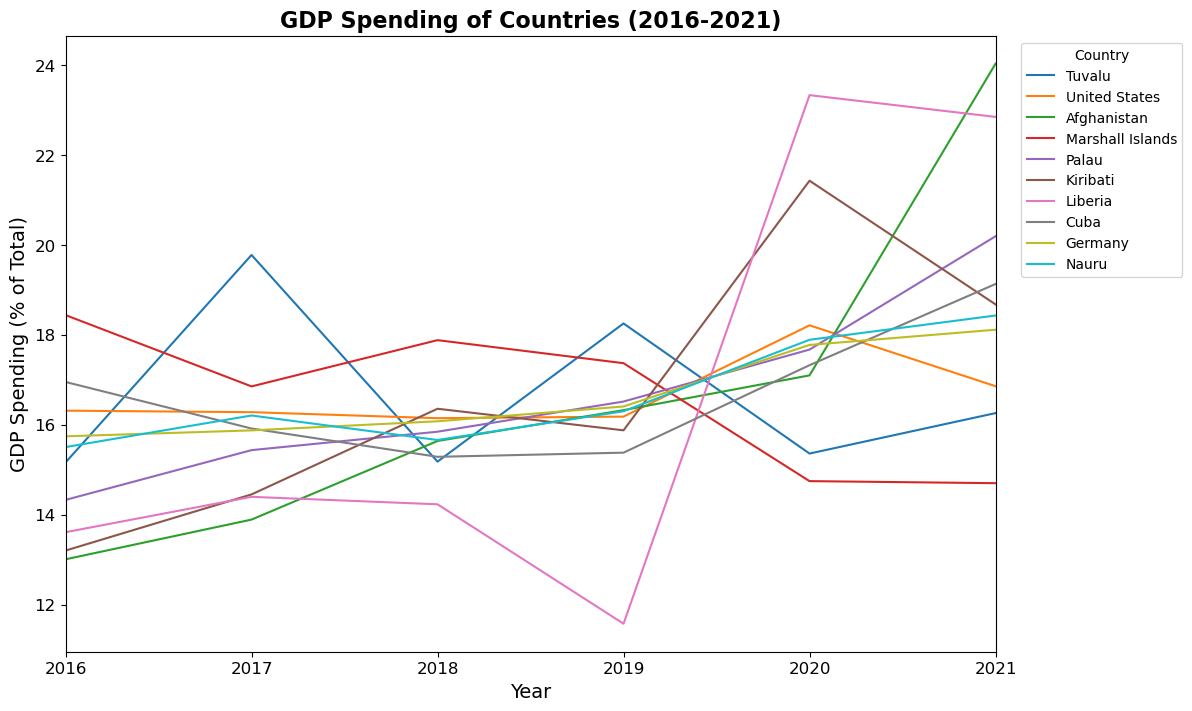

In [50]:
plot_gdp_spending(gdp)